# Linear Transformation

In [1]:
import numpy as np
import cv2

## 1 - Transformations

In [2]:
def T(v):
    w = np.zeros((3,1))
    w[0,0] = 3*v[0,0]
    w[2,0] = -2*v[1,0]
    
    return w

v = np.array([[3], [5]])
w = T(v)

print("Original vector:\n", v, "\n\n Result of the transformation:\n", w)

Original vector:
 [[3]
 [5]] 

 Result of the transformation:
 [[  9.]
 [  0.]
 [-10.]]


## 2 - Linear Transformations

In [3]:
u = np.array([[1], [-2]])
v = np.array([[2], [4]])

k = 7

print("T(k*v):\n", T(k*v), "\n k*T(v):\n", k*T(v), "\n\n")
print("T(u+v):\n", T(u+v), "\n T(u)+T(v):\n", T(u)+T(v))

T(k*v):
 [[ 42.]
 [  0.]
 [-56.]] 
 k*T(v):
 [[ 42.]
 [  0.]
 [-56.]] 


T(u+v):
 [[ 9.]
 [ 0.]
 [-4.]] 
 T(u)+T(v):
 [[ 9.]
 [ 0.]
 [-4.]]


## 3 - Transformations Defined as a Matrix Multiplication

In [4]:
def L(v):
    A = np.array([[3,0], [0,0], [0,-2]])
    print("Transformation matrix:\n", A, "\n")
    w = A @ v
    
    return w

v = np.array([[3], [5]])
w = L(v)

print("Original vector:\n", v, "\n\n Result of the transformation:\n", w)

Transformation matrix:
 [[ 3  0]
 [ 0  0]
 [ 0 -2]] 

Original vector:
 [[3]
 [5]] 

 Result of the transformation:
 [[  9]
 [  0]
 [-10]]


## 4 - Standard Transformations in a Plane

### 4.1 Horizontal Scaling (Dilation)

In [5]:
def T_hscaling(v):
    A = np.array([[2,0], [0,1]])
    w = A @ v
    
    return w
    
    
def transform_vectors(T, v1, v2):
    V = np.hstack((v1, v2))
    W = T(V)
    
    return W
    
e1 = np.array([[1], [0]])
e2 = np.array([[0], [1]])

transformation_result_hscaling = transform_vectors(T_hscaling, e1, e2)

print("Original vectors:\n e1= \n", e1, "\n e2=\n", e2, 
      "\n\n Result of the transformation (matrix form):\n", transformation_result_hscaling)

Original vectors:
 e1= 
 [[1]
 [0]] 
 e2=
 [[0]
 [1]] 

 Result of the transformation (matrix form):
 [[2 0]
 [0 1]]


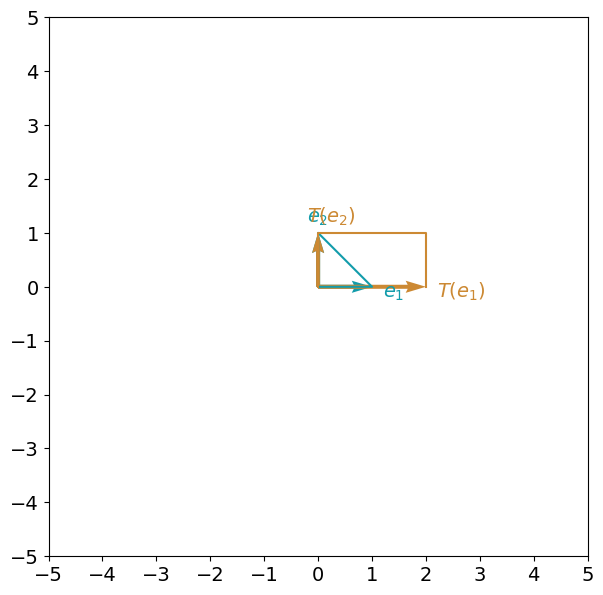

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_transformation(T, e1, e2):
    color_original = "#129cab"
    color_transformed = "#cc8933"
    
    e1 = np.array(e1)
    e2 = np.array(e2)
    
    _, ax = plt.subplots(figsize=(7, 7))
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xticks(np.arange(-5, 6))
    ax.set_yticks(np.arange(-5, 6))
    
    plt.axis([-5, 5, -5, 5])
    plt.quiver([0, 0], [0, 0], [e1[0], e2[0]], [e1[1], e2[1]], color=color_original, angles='xy', scale_units='xy', scale=1)
    plt.plot([0, e2[0], e1[0], 0], [0, e2[1], e1[1], 0], color=color_original)
    
    e1_sgn = 0.4 * np.sign(e1)
    e2_sgn = 0.4 * np.sign(e2)
    ax.text(e1[0] - 0.2 + e1_sgn[0], e1[1] - 0.2 + e1_sgn[1], '$e_1$', fontsize=14, color=color_original)
    ax.text(e2[0] - 0.2 + e2_sgn[0], e2[1] - 0.2 + e2_sgn[1], '$e_2$', fontsize=14, color=color_original)
    
    e1_transformed = T(e1)
    e2_transformed = T(e2)
    
    plt.quiver([0, 0], [0, 0], [e1_transformed[0], e2_transformed[0]], [e1_transformed[1], e2_transformed[1]], 
               color=color_transformed, angles='xy', scale_units='xy', scale=1)
    plt.plot([0, e2_transformed[0], e1_transformed[0] + e2_transformed[0], e1_transformed[0]], 
             [0, e2_transformed[1], e1_transformed[1] + e2_transformed[1], e1_transformed[1]], 
             color=color_transformed)
    
    e1_transformed_sgn = 0.4 * np.sign(e1_transformed)
    e2_transformed_sgn = 0.4 * np.sign(e2_transformed)
    ax.text(e1_transformed[0] - 0.2 + e1_transformed_sgn[0], e1_transformed[1] - 0.2 + e1_transformed_sgn[1], 
            '$T(e_1)$', fontsize=14, color=color_transformed)
    ax.text(e2_transformed[0] - 0.2 + e2_transformed_sgn[0], e2_transformed[1] - 0.2 + e2_transformed_sgn[1], 
            '$T(e_2)$', fontsize=14, color=color_transformed)
    
    plt.gca().set_aspect("equal")
    plt.show()

# Example usage
e1 = [1, 0]
e2 = [0, 1]

def T_hscaling(v):
    return np.dot([[2, 0], [0, 1]], v)

plot_transformation(T_hscaling, e1, e2)
